In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving bank-full.csv to bank-full.csv


In [3]:
data = pd.read_csv('bank-full.csv', sep = ';')# Importing the dataset
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


***EDA***

In [4]:
data.shape

(45211, 17)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


# Checking for missing values

In [7]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [8]:
columns = data.columns
columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'duration'}>],
       [<Axes: title={'center': 'campaign'}>,
        <Axes: title={'center': 'previous'}>]], dtype=object)

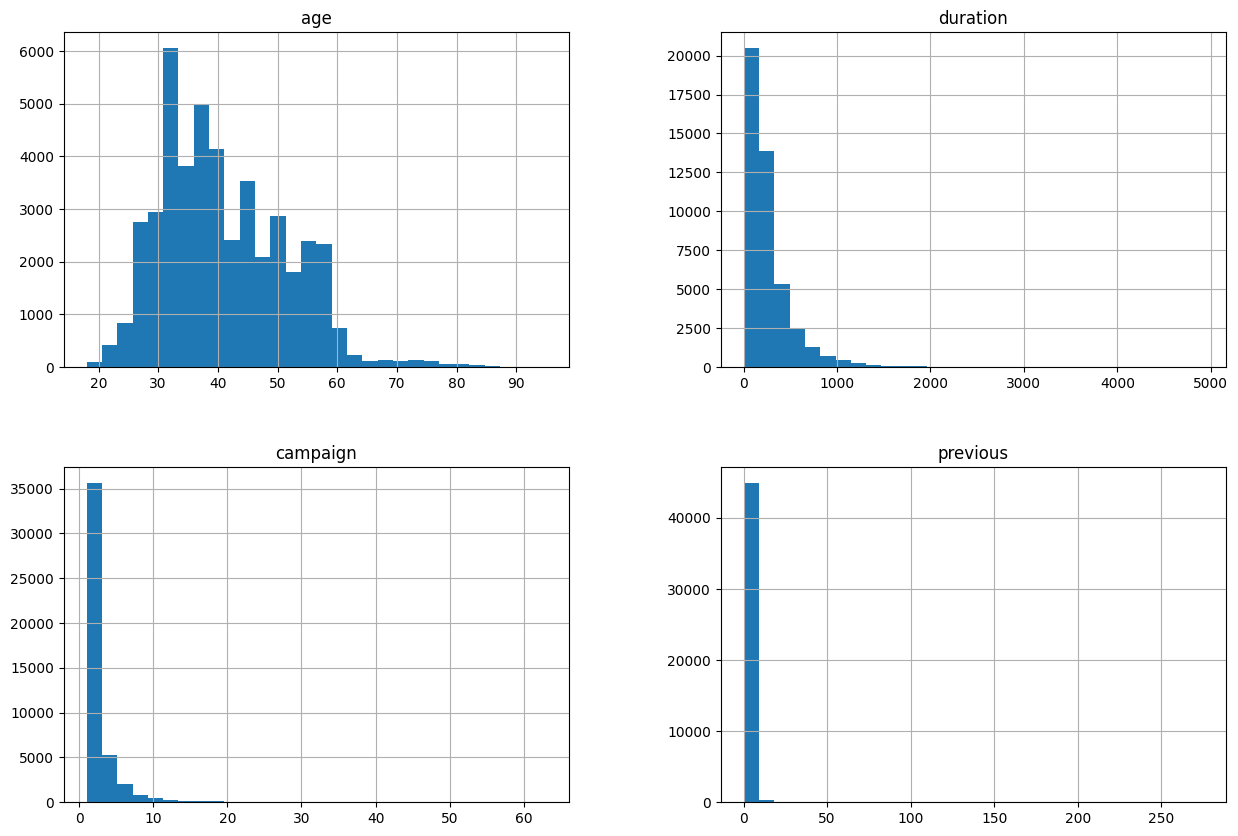

In [9]:
data[['age','duration', 'campaign', 'previous']].hist(bins = 30, figsize=(15,10))

In [10]:
category_features = data.select_dtypes(include=['object', 'bool']).columns.values

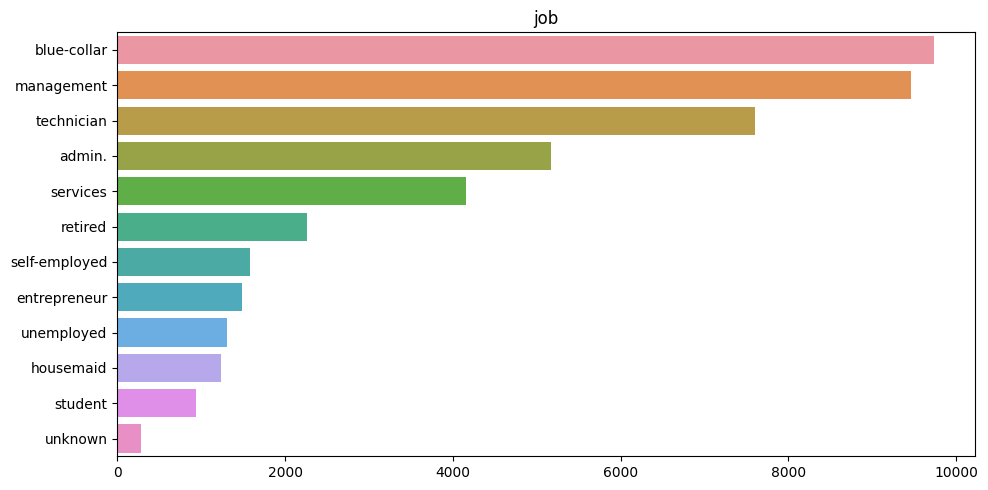

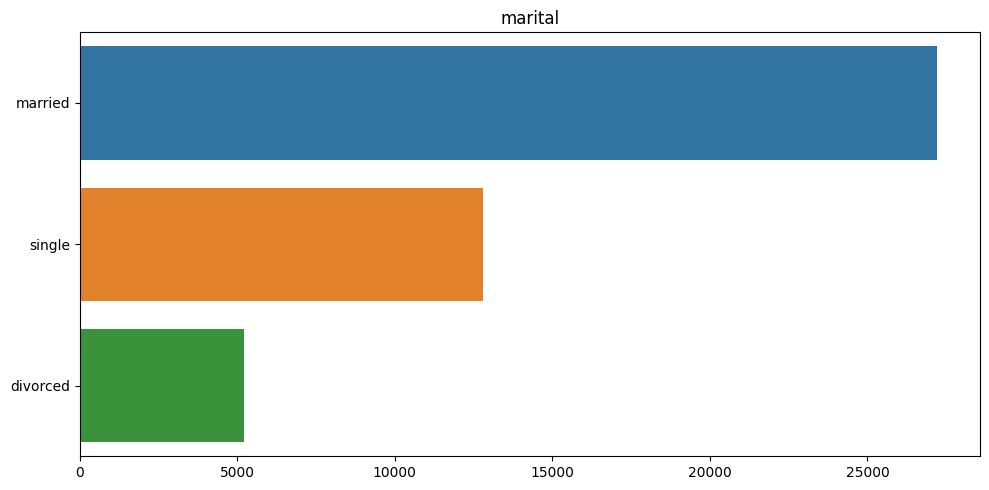

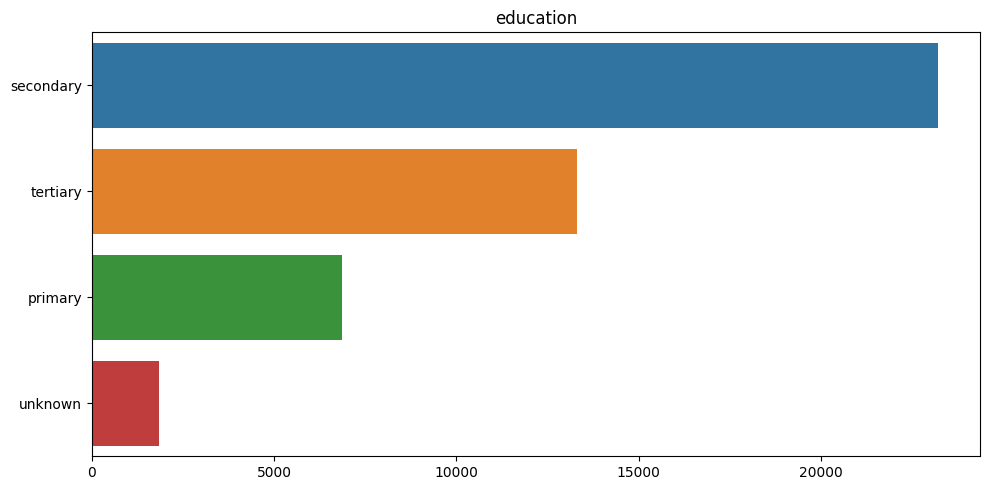

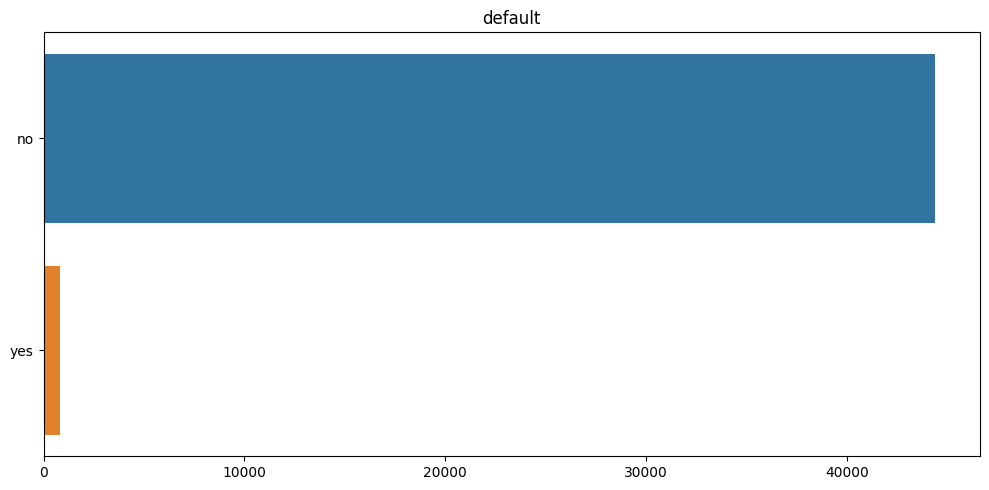

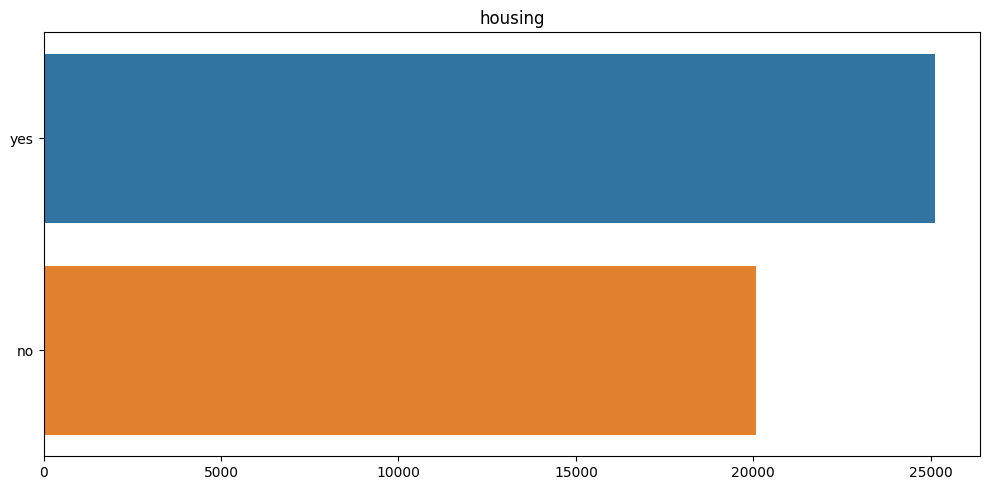

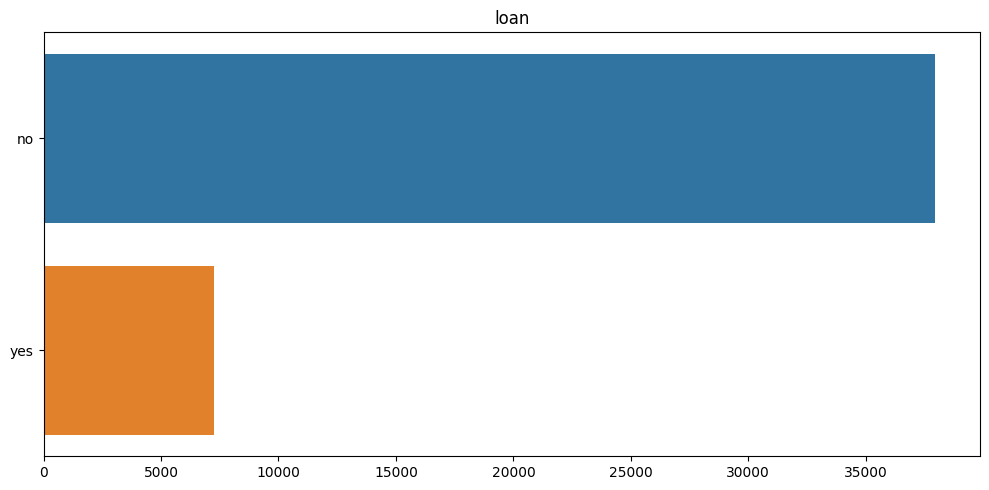

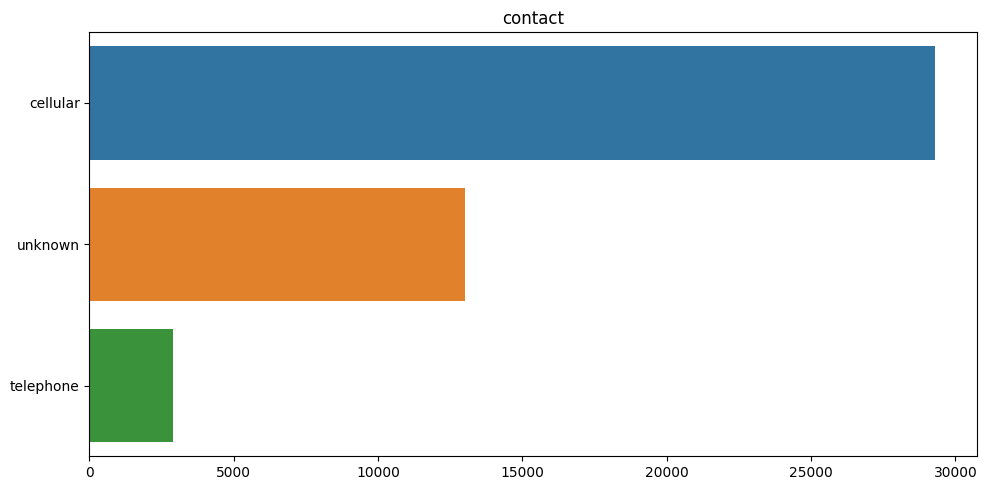

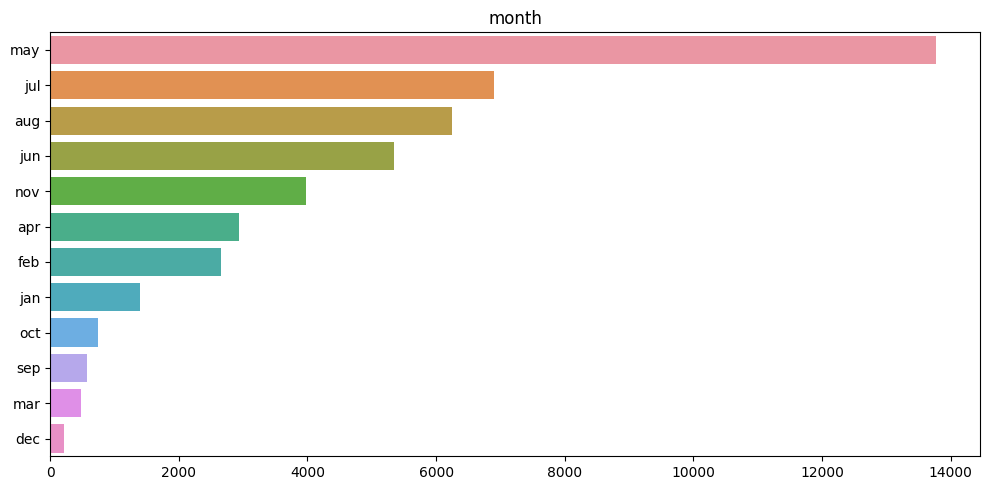

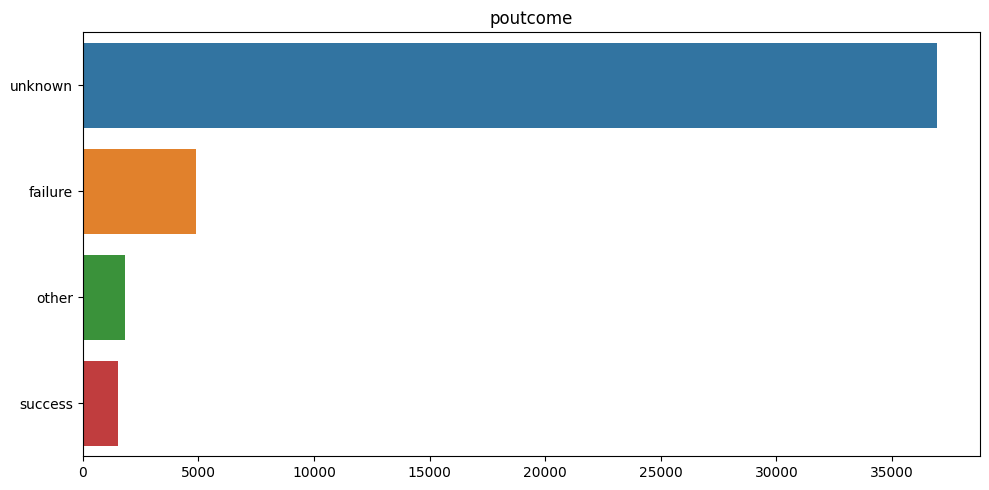

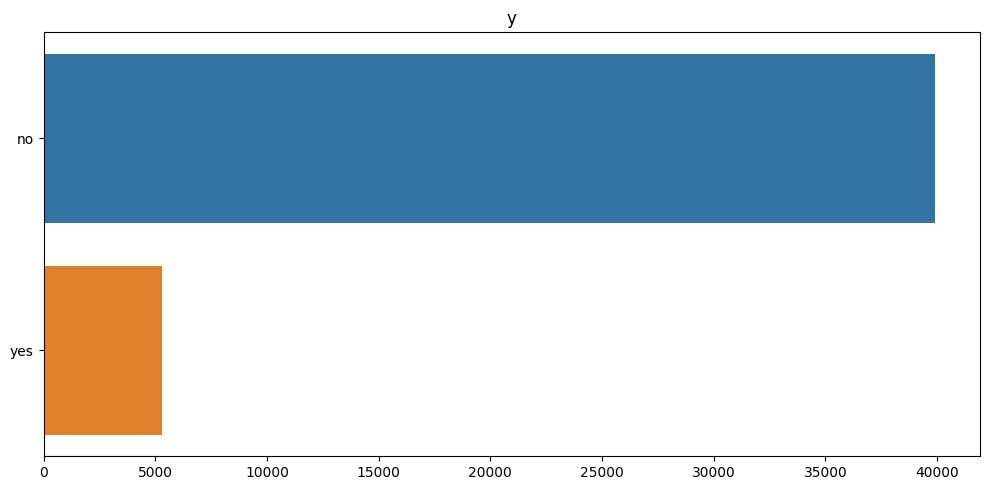

In [12]:
for col in category_features:
    data[col].value_counts().values
    plt.figure(figsize=(10,5))
    sns.barplot(x=data[col].value_counts().values, y=data[col].value_counts().index, data=data)
    plt.title(col)
    plt.tight_layout()

In [13]:
data['marital'].dtype

dtype('O')

In [14]:
df = [data[x].value_counts() for x in columns if data[x].dtype == 'O']

In [15]:
df

[blue-collar      9732
 management       9458
 technician       7597
 admin.           5171
 services         4154
 retired          2264
 self-employed    1579
 entrepreneur     1487
 unemployed       1303
 housemaid        1240
 student           938
 unknown           288
 Name: job, dtype: int64,
 married     27214
 single      12790
 divorced     5207
 Name: marital, dtype: int64,
 secondary    23202
 tertiary     13301
 primary       6851
 unknown       1857
 Name: education, dtype: int64,
 no     44396
 yes      815
 Name: default, dtype: int64,
 yes    25130
 no     20081
 Name: housing, dtype: int64,
 no     37967
 yes     7244
 Name: loan, dtype: int64,
 cellular     29285
 unknown      13020
 telephone     2906
 Name: contact, dtype: int64,
 may    13766
 jul     6895
 aug     6247
 jun     5341
 nov     3970
 apr     2932
 feb     2649
 jan     1403
 oct      738
 sep      579
 mar      477
 dec      214
 Name: month, dtype: int64,
 unknown    36959
 failure     4901
 other

In [16]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [23]:
data['marital'].unique()

array([0, 1, 2])

In [22]:
data['marital'] = data['marital'].map({'married':0, 'single':1, 'divorced':2})

<ipython-input-21-8b879446d117>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot = True)


<Axes: >

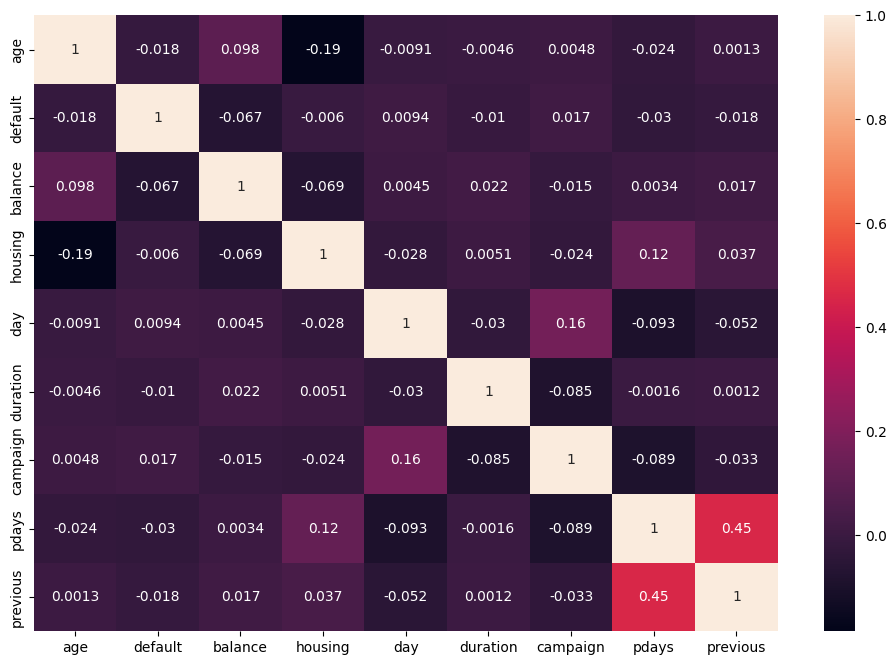

In [21]:
fig = plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot = True)

In [20]:
data['default'].unique()

array([0, 1])

In [19]:
data['default'] = data['default'].map({'no':0, 'yes':1})

In [18]:
data['housing'].unique()

array([1, 0])

In [17]:
data['housing'] = data['housing'].map({'no':0, 'yes':1})

In [24]:
data['loan'].unique()

array(['no', 'yes'], dtype=object)

In [25]:
data['loan'] = data['loan'].map({'no':0, 'yes':1})

In [26]:
data['y'].unique()

array(['no', 'yes'], dtype=object)

In [27]:
data['y'] = data['y'].map({'no':0, 'yes':1})

In [28]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,0,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,1,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,0,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,0,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,1,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0


In [29]:
data['contact'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [30]:
data['contact'] = data['contact'].map({'unknown':0,'cellular':1,'telephone':2})

In [31]:
data.drop(['day', 'month'], axis = 1, inplace =True)

In [ ]:
data.head()

In [33]:
data[data.duplicated()]

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
26091,54,management,0,tertiary,0,0,0,0,1,214,3,-1,0,unknown,0


In [34]:
data = data.drop_duplicates()

In [35]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['job'] = le.fit_transform(data['age'])
data['education'] = le.fit_transform(data['education'])
data['poutcome'] = le.fit_transform(data['poutcome'])

In [ ]:
data.head()

In [37]:
data.shape

(45210, 15)

In [38]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit_transform(data)

array([[ 1.6070013 ,  1.60713063, -0.74067905, ..., -0.25194333,
         0.44490403, -0.36398717],
       [ 0.28855812,  0.28859331,  0.70243851, ..., -0.25194333,
         0.44490403, -0.36398717],
       [-0.74736152, -0.7474003 , -0.74067905, ..., -0.25194333,
         0.44490403, -0.36398717],
       ...,
       [ 2.92544448,  2.92566794, -0.74067905, ...,  1.05045688,
        -0.56616018,  2.74734957],
       [ 1.51282679,  1.51294939, -0.74067905, ..., -0.25194333,
         0.44490403, -0.36398717],
       [-0.37066347, -0.37067535, -0.74067905, ...,  4.52352411,
        -1.57722439, -0.36398717]])

In [39]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'y'],
      dtype='object')

In [40]:
x  = data.iloc[:,:14].values
y = data['y'].values

In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [42]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [43]:
y_pred = lr.predict(x_test)

In [44]:
df = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})

In [ ]:
df

In [46]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

[[7805  165]
 [ 870  202]]
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7970
           1       0.55      0.19      0.28      1072

    accuracy                           0.89      9042
   macro avg       0.73      0.58      0.61      9042
weighted avg       0.86      0.89      0.86      9042



<Axes: >

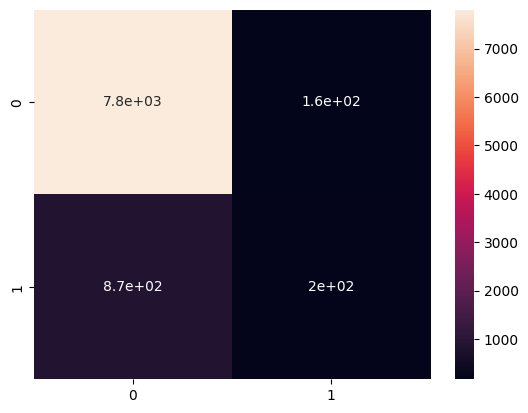

In [47]:
sns.heatmap(cm, annot = True)